### IDs:
Insert yours IDs to the cell below

ID #1: 227367455

ID #2: 318299559


In [1]:
import numpy as np
from numpy import sum #overriding the built-in sum can be removed to remove np.sum generator warning
import matplotlib.pyplot as plt 
import scipy.stats as ss
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0)

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

1.1)

In [2]:
dataset = load_boston()
print(dataset.DESCR)

df = pd.DataFrame(dataset.data)
df.columns = dataset.feature_names
df.head(5)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/Users/dan/Google Drive/School/IDC/Year III/Semester 1/Statistics and Data Analysis/Exercices/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


This dataset contains 506 row instances and 13 feature columns. The datatype of each variable are numpy.float64.

1.2)

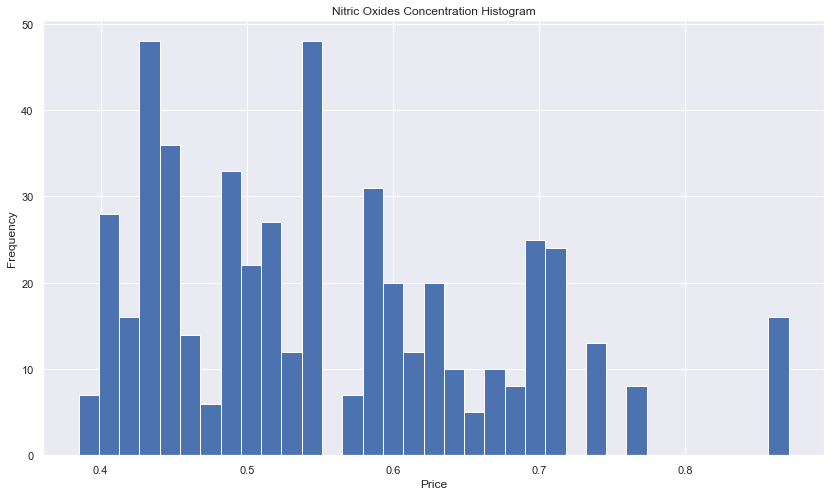

In [3]:
plt.title("Nitric Oxides Concentration Histogram")
plt.xlabel("Price")
plt.ylabel("Frequency")
df['NOX'].hist(bins=35)
plt.show()

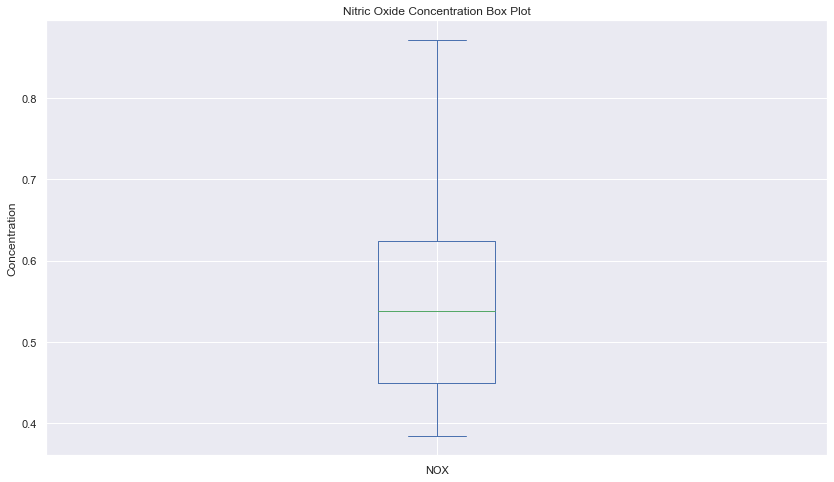

In [4]:
plt.title("Nitric Oxide Concentration Box Plot")
plt.ylabel("Concentration")
df['NOX'].plot.box()
plt.show()

We can see that with lower nitric oxide concentration there are more houses which is an indicator of indoor air quality.

1.3)

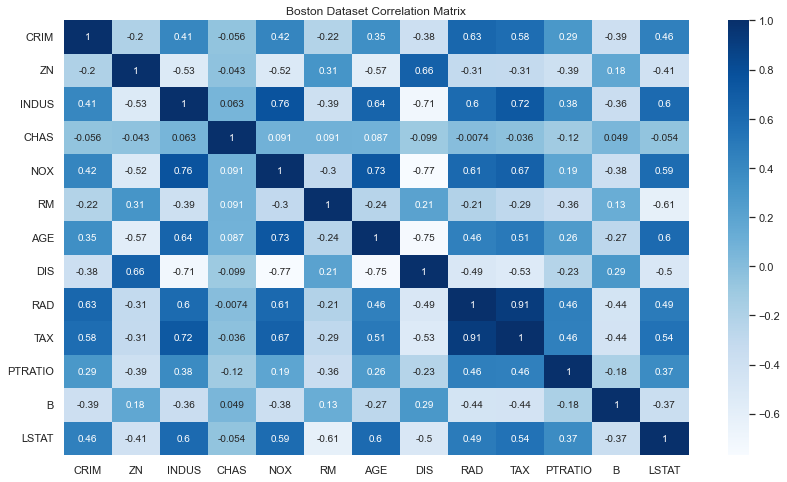

In [5]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap= "Blues")
plt.title("Boston Dataset Correlation Matrix")
plt.show()


In [6]:
labels = [i for i in corr_matrix]

corr_list = [dict(x=i, y=j, value=corr_matrix[i][j]) for i in labels for j in labels if i != j]
corr_list.sort(key=lambda x : abs(x['value']), reverse=True)
top_5 = corr_list[::2][:5] # TOP 5 highest correlations
print("Top 5 Correlations:")
top_5

Top 5 Correlations:


[{'x': 'RAD', 'y': 'TAX', 'value': 0.9102281885331865},
 {'x': 'NOX', 'y': 'DIS', 'value': -0.7692301132258282},
 {'x': 'INDUS', 'y': 'NOX', 'value': 0.7636514469209139},
 {'x': 'AGE', 'y': 'DIS', 'value': -0.747880540868632},
 {'x': 'NOX', 'y': 'AGE', 'value': 0.7314701037859592}]

CHAS is clearly highly uncorrelated to any other feature except itself and is just a boolean number if we look at the description thus being very unusual

We can see that RAD and TAX are highly positively correlated.

1.4)

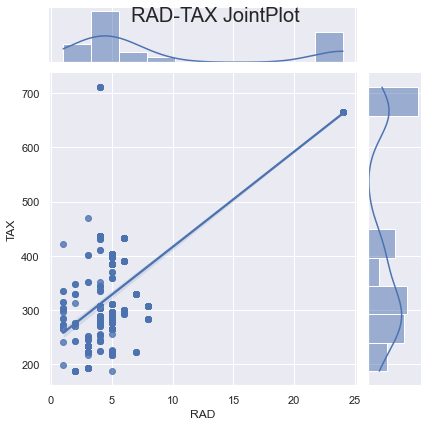

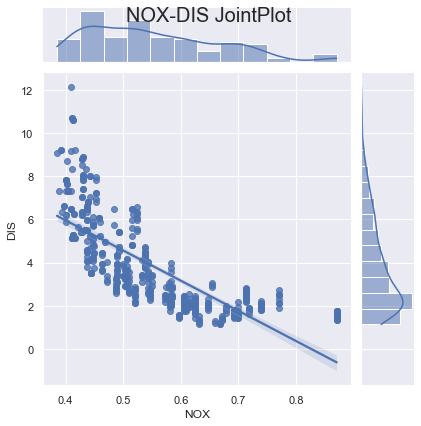

In [7]:
first = top_5[0]
second = top_5[1]

fig = sns.jointplot(data = df, x=first['x'],y=first['y'],kind='reg')
fig.fig.suptitle(f"{first['x']}-{first['y']} JointPlot", fontsize= 20)
fig = sns.jointplot(data = df, x=second['x'],y=second['y'],kind='reg')
fig.fig.suptitle(f"{second['x']}-{second['y']} JointPlot", fontsize= 20)
plt.show()

1.5)

[]

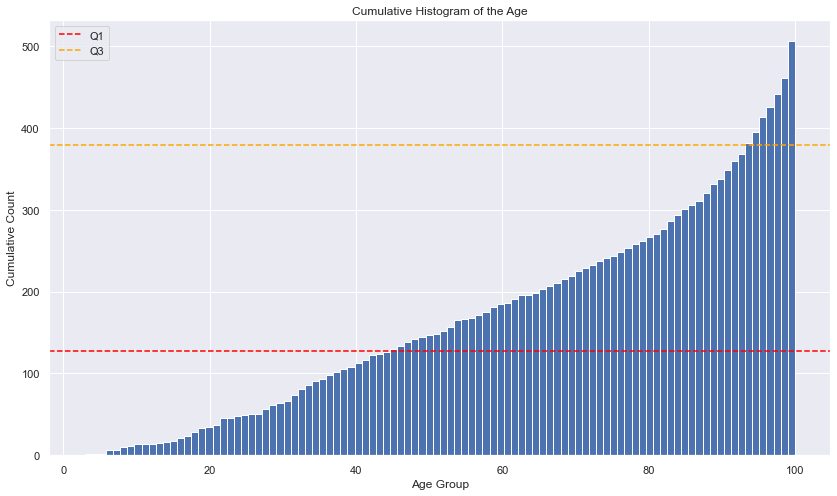

In [8]:
plt.title("Cumulative Histogram of the Age")

q1 = np.percentile(df['AGE'],25)
q1_count = len(df['AGE'][df['AGE'] < q1])
q3 = np.percentile(df['AGE'],75)
q3_count = len(df['AGE'][df['AGE'] < q3])

age_plot = plt.hist(df['AGE'], cumulative = True, bins=100)
plt.axhline(q1_count, color='red', linestyle='dashed', label='Q1')
plt.axhline(q3_count, color='orange', linestyle='dashed',label='Q3')
plt.xlabel("Age Group")
plt.ylabel("Cumulative Count")
plt.legend()
plt.plot()

1.6)

There are other interesting trends such as DIS and AGE and NOX and AGE.

AGE and NOX is positively correlated and makes sense since unless highly renovated and up to norm, older bildings usually have worse insulation and airflow which can lead to the accumulation of nitric oxide. Older building are usually in city centers where it is more polluted.

DIS and AGE are negatively correlated which makes also sense since older building are usually loacted in city centers and therefore are closer to employment centers which should be located in areas where employment demand is high.

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=2$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

We only need $n \cdot m \cdot k - 1$ parameters as we can calculate the last parameter using the other ($P(X=x) = 1-  \sum_{y\neq x}P(X=y)$)

Here $k = 2$ so we get $2 \cdot n \cdot m - 1$ parameters

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

Now since we know that each distribution are independent we can consider X, Y and Z apart.

Similarly to 2a, we only need for $X$ $n - 1$ parameters, for $Y$ $m - 1$ parameters, for $Z$ $k - 1 = 2 - 1 = 1$ parameters

In total, we get : $(n - 1) + (m - 1) + 1 = n + m + 1$ parameters.

#### 2.C

For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

$P(X=x, Y=y, Z=z) = P(X=x | Z=z, Y=y) \cdot P(Y=y | Z=z) \cdot P(Z=z) =  P(X=x | Z=z) \cdot P(Y=y | Z=z) \cdot P(Z=z)$

($P(Y=y) = 1-  \sum_{y\neq x}P(X=y | Z = z)$) so we have $(m-1) \cdot k = 2 \cdot (m -1 )$ parameters. 

Similarly for $P(X=x | Z=z)$ we have $  2 \cdot (n -1 )$ parameters. 

For the Z distribution we get as before $k - 1 = 1$

Therefore we have a total of  $  2 \cdot (m -1 ) \cdot 2  \cdot (n - 1) \cdot 1 = 4 \cdot (m -1 ) \cdot (n -1 )$ 

#### 2.D

Give an example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are NOT conditionally independent given $Z$, but $X$ and $Y$ are (unconditionally) independent.

Where $X$ and $Y$ are standard normal distribution ($N(0, 1)$).

Let $X, Y \sim N(0,1)$ 

$ Z = X - Y$

Clearly $X \neq Y$

$P(X | Z =z) = P( Z + Y | Z=z) = P(z + Y = y | Z=z) = P(Y = y - z| Z=z)$

It shows that X or why can be represented into the other through conditional probabilities with Z.



### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

In [9]:
df = pd.read_csv('GMD_2021.csv',header=None)
data = df[1].values
means = [4, 9, data.mean()]
stds = [0.5,0.5, 1.5]
weights = [0.25, 0.25, 0.5]

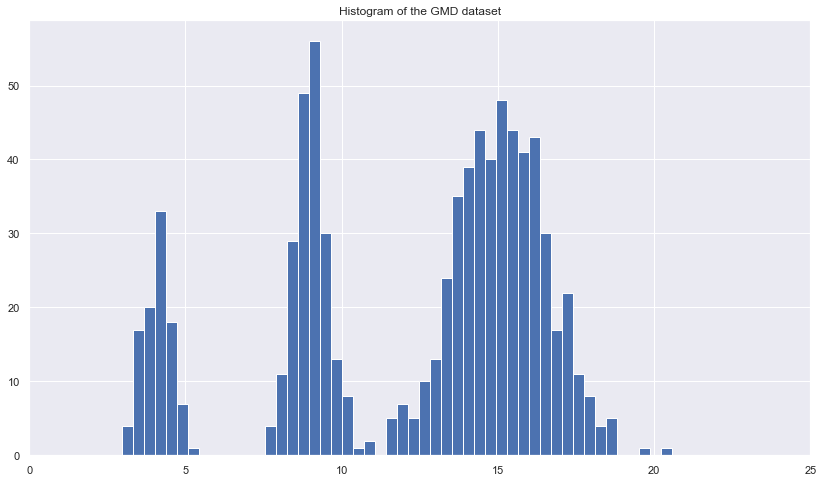

In [10]:
plt.hist(data, bins = 50)
plt.title('Histogram of the GMD dataset')
plt.xlim([0, 25])
plt.show()

## Method 1 - By visualization: 

We can see 3 separate curves with most datapoints in [0, 6], [7,11], [12, 20]
We can separate the data in this range and try to get the mean and std of the 3 separate curves:

In [11]:
c1 = data[data < 6]
c2 = data[(7 < data) & (data < 11)]
c3 = data[12 < data]


print(f"Curve 1- mean: {c1.mean()} std: {c1.std()} weight: {len(c1) / len(data)}")
print(f"Curve 2- mean: {c2.mean()} std: {c2.std()} weight: {len(c2) / len(data)}")
print(f"Curve 3- mean: {c3.mean()} std: {c3.std()} weight: {len(c3) / len(data)}")

Curve 1- mean: 4.083810608397516 std: 0.46878881844482223 weight: 0.125
Curve 2- mean: 9.012985022621198 std: 0.5469250767143606 weight: 0.2525
Curve 3- mean: 15.185407226087936 std: 1.409648431372443 weight: 0.61125


## Method 2 - By using EM: 

In this case we used the pre existing sklearn code to double check the values and our own code to implement EM.


In [12]:
from sklearn.mixture import GaussianMixture

def GMM_sklearn(data, weights, means):
    data = data.copy().reshape(-1, 1)
    gm = GaussianMixture(n_components=3, weights_init=weights, means_init=np.array(means).reshape(-1, 1))
    gm.fit(data)

    means = gm.means_
    covs = gm.covariances_
    weights = gm.weights_

    print(f'Means: {means[0][0]}, {means[1][0]}, {means[2][0]}')
    print(f'Standard Deviations: {covs[0][0][0]} , {covs[1][0][0]} , {covs[2][0][0]}')
    print(f'Weights : {weights[0]} , {weights[1]} , {weights[2]}')

    return gm 

In [13]:
gm = GMM_sklearn(data, weights=weights, means=means)

Means: 7.419664709120422, 9.485235080922159, 15.318773656168057
Standard Deviations: 7.654500728666896 , 13.34465693586 , 1.6641804715875905
Weights : 0.18359642398845863 , 0.286221201273868 , 0.530182374737673


In [14]:
def norm_pdf(x, mu, sigma):
    pdf = np.power(np.e, -np.square((x - mu) / sigma) / 2) / (np.sqrt(2 * np.pi) * sigma)
    return pdf


class EM:
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for calculating the likelihood.
    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    n_iter : int
      Passes over the training dataset in the EM proccess
    eps: float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random params initialization.
    """
    
    def __init__(self, k=1, n_iter=1000, eps=0.01, random_state=42):
        self.k = range(k)
        self.n_iter = n_iter
        self.eps = eps
        self.random_state = random_state
        
    def compute_cost(self, data):
        return sum(np.log([self.get_instance_likelihood(x_i) for x_i in data]))
        
    # initial guesses for parameters
    def init_params(self,  means, stds, weights):
        """
        Initialize distribution params
        """
        np.random.seed(self.random_state)
        self.weights = weights
        self.means = means
        self.stds = stds
        self.resp = []
    
    def _expectation(self, data):
        """
        E step - calculating responsibilities
        """
        n = data.shape[0]
        probabilities = np.array([self.weights[i] * norm_pdf(data, self.means[i], self.stds[i]) for i in self.k])
        values = np.array([[probabilities[j][i] for j in self.k] for i in range(n)])
        self.resp = np.array([values[i] / sum(values[i]) for i in range(n)])
        
    def _maximization(self, data):
        n = data.shape[0]
        self.weights = [(1 / n) * sum(self.resp[:,i]) for i in self.k]
        self.means = [(1 / (self.weights[i] * n)) * sum(self.resp[:,i] * data) for i in self.k]
        self.stds = [np.sqrt((1 / (self.weights[i] * n)) * sum(self.resp[:,i] * np.square(data - self.means[i]))) for i in self.k]
        
    def fit(self,  means, stds, weights, data, init = True):
        """ 
        Fit training data (the learning phase).
        Use init_params and then expectation and maximization function in order to find params 
        for the distribution. 
        Store the params in attributes of the EM object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.
        """
        data = data.copy()
                
        if init:
            self.init_params(means, stds, weights)
            
        last_cost = self.compute_cost(data)
        for i in range(self.n_iter):
            self._expectation(data)
            self._maximization(data)
            new_cost = self.compute_cost(data)
            if new_cost != last_cost and np.allclose(new_cost, last_cost, atol = self.eps):
                break
            last_cost = new_cost

    def get_dist_params(self):
        return self.means, self.stds, self.weights
    
    def get_instance_likelihood(self, X):
        return sum((self.weights[i] * norm_pdf(X, self.means[i], self.stds[i]) for i in self.k))


In [15]:
GMM = EM(k=3)
GMM.fit(means=means , stds=stds, weights=weights, data=data)
res_means, res_stds, res_weights = GMM.get_dist_params()

/var/folders/s1/1wbz3jx549s9m620xqw7ffgh0000gp/T/ipykernel_41238/1196963677.py:83: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return sum((self.weights[i] * norm_pdf(X, self.means[i], self.stds[i]) for i in self.k))


In [16]:
res_means

[4.083810607979653, 8.997344317930777, 15.102414456868773]

In [17]:
res_stds

[0.46878881802861433, 0.5248937385032201, 1.5016619875210087]

In [18]:
res_weights

[0.12499999995247572, 0.24999645531283798, 0.6250035447346862]

We can see that both the method throough visualization and our EM code agree more or less on the same values (sklearn may vary more from time to time since it has no intialization on the weights or the stds which would help it converge better).

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

The limits we chose are 4 stds to the left of the leftmost distribution and 4 stds to the right of the rightmost distribution as it will ensure to capture more than 99% of the distribution area.

/var/folders/s1/1wbz3jx549s9m620xqw7ffgh0000gp/T/ipykernel_41238/10108309.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  plt.plot(x_axis,  sum(res_weights[i] * ss.norm.pdf(x_axis,res_means[i],res_stds[i]) for i in range(3)), label = "Infered Distribution")


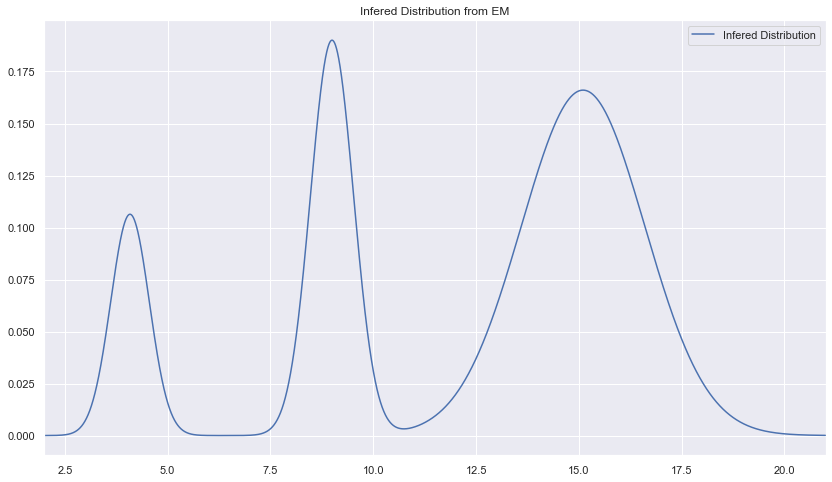

In [19]:
x_axis = np.arange(2, 21, 0.001)
plt.xlim([2, 21])
plt.plot(x_axis,  sum(res_weights[i] * ss.norm.pdf(x_axis,res_means[i],res_stds[i]) for i in range(3)), label = "Infered Distribution")
plt.title('Infered Distribution from EM')
plt.legend()
plt.show()

/var/folders/s1/1wbz3jx549s9m620xqw7ffgh0000gp/T/ipykernel_41238/341016074.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  plt.plot(x_axis, len(data) / 3 * sum(res_weights[i] * ss.norm.pdf(x_axis,res_means[i],res_stds[i]) for i in range(3)), label = "Scaled Infered Distribution")


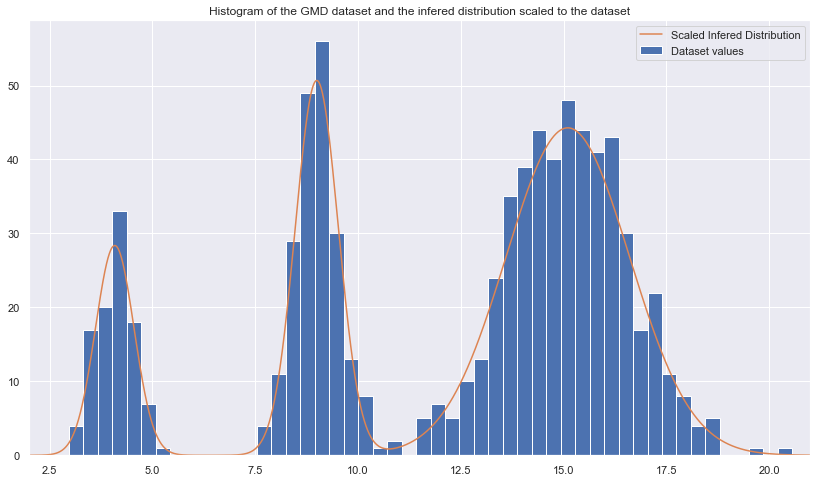

In [20]:
x_axis = np.arange(2, 21, 0.001)
plt.hist(data, bins = 50, label= "Dataset values")
plt.xlim([2, 21])
plt.plot(x_axis, len(data) / 3 * sum(res_weights[i] * ss.norm.pdf(x_axis,res_means[i],res_stds[i]) for i in range(3)), label = "Scaled Infered Distribution")
plt.title('Histogram of the GMD dataset and the infered distribution scaled to the dataset')
plt.legend()
plt.show()

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

Clearly, there are 3 curves and assuming that there is a 4th will lead to overfitting and in general a bad model.

The first method which was using the visualization from the fact that there are 3 curves and separating them. Since we can't make up a 4th one this method wont work.

EM will also give a bad result and will probably split the rightmost curve into 2 symmetric curves since it has a bigger deviation.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$


Let $X_1 \sim N(3, 1), X_2 \sim N(7, 1), X_3 \sim N(10, 1)$


### Direct sampling:


Sample $\frac{n}{3}$ datapoints for  $X_1, X_2 , X_3$


### Inverse sampling:

Let $Y \sim U(1,3)$ then we can create a distribution $X = \sum_{i=1}^3 P(Y=i) * X_i$

That is, we with a uniform chance of $\frac{1}{3}$ we fall on one of the distributions.

Using the inverse cdf function we are able to generate these variables.

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


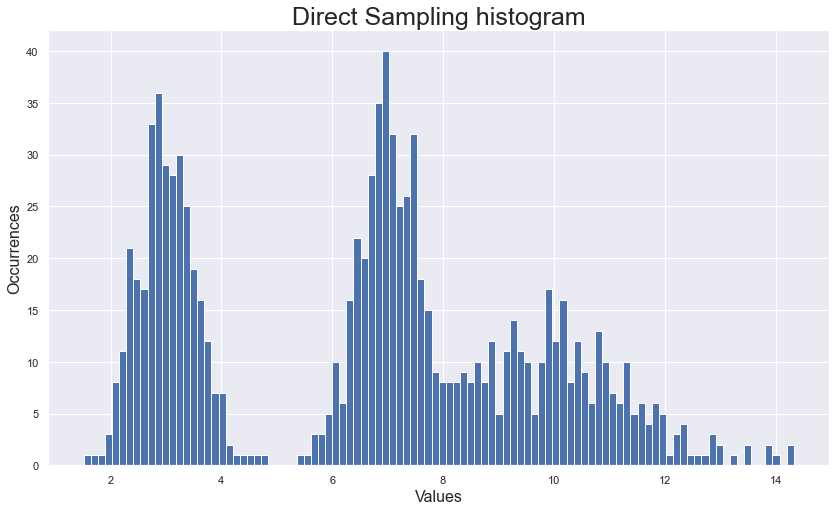

In [33]:
# Direct Sampling
np.random.seed(100) 
n = 1000
k = 3
means = [3, 7, 10]
std = [1, 1, 1]
weights = [0.33, 0.33, 0.33]

distribution_A = np.concatenate([np.random.normal(loc=means[i], scale=stds[i], size=round(n * weights[i])) for i in range(k)])

plt.hist(distribution_A , bins=100)
plt.title('Direct Sampling histogram', fontsize=25)
plt.xlabel('Values', fontsize=16)
plt.ylabel('Occurrences', fontsize=16)
plt.show()

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

/var/folders/s1/1wbz3jx549s9m620xqw7ffgh0000gp/T/ipykernel_41238/3368698246.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ax[0].plot(x_axis,  sum(weights[i]**2 * len(distribution_A) * ss.norm.pdf(x_axis,means[i],std[i]) for i in range(k)), label = "Distribution")
/var/folders/s1/1wbz3jx549s9m620xqw7ffgh0000gp/T/ipykernel_41238/3368698246.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ax[1].plot(x_axis,  sum(weights[i]**2 * len(distribution_B) * ss.norm.pdf(x_axis,means[i],std[i]) for i in range(k)), label = "Distribution")


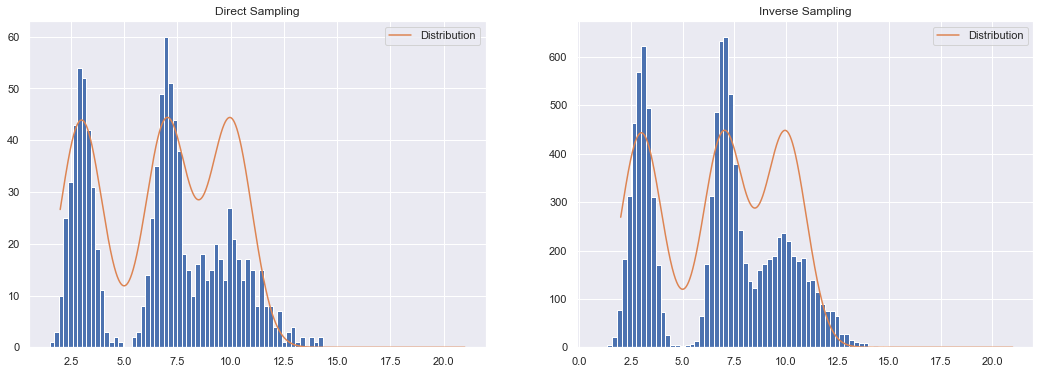

In [39]:
# Inverse Sampling
np.random.seed(42) 
n = 10000
k = 3
means = [3, 7, 10]
std = [1, 1, 1]
weights = [1/3, 1/3, 1/3]

distribution_B = np.concatenate([norm.ppf(np.random.rand(round(n * weights[i])), loc=means[i], scale=stds[i]) for i in range(k)])

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].hist(distribution_A, bins=60)
ax[0].plot(x_axis,  sum(weights[i]**2 * len(distribution_A) * ss.norm.pdf(x_axis,means[i],std[i]) for i in range(k)), label = "Distribution")
ax[0].set_title('Direct Sampling')
ax[0].legend()
ax[1].hist(distribution_B, bins=60)
ax[1].plot(x_axis,  sum(weights[i]**2 * len(distribution_B) * ss.norm.pdf(x_axis,means[i],std[i]) for i in range(k)), label = "Distribution")
ax[1].set_title('Inverse Sampling')
ax[1].legend()
plt.show()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

In [23]:
from scipy.stats import norm

mean = 70000
std = 30000

#### 4.A
What percent of people earn less than 50,000 RCU?

In [24]:
x = 50000
norm_cdf = norm.cdf(x, loc=mean, scale=std)
print(f'{round(norm_cdf * 100, 3)}% of employees have an anual salary of less than {x} RCU')

25.249% of employees have an anual salary of less than 50000 RCU


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [25]:
x = 45000
y = 65000
x_norm_cdf = norm.cdf(x, loc=mean, scale=std)
y_norm_cdf = norm.cdf(y, loc=mean, scale=std)

print(f'{round((y_norm_cdf - x_norm_cdf) * 100, 3)}% of employees have an anual salary between {x} and {y} RCU')

23.149% of employees have an anual salary between 45000 and 65000 RCU


#### 4.C
What percent of people earn more than 70,000 RCU?

In [26]:
x = 70000
complement_norm_cdf = 1 - norm.cdf(x, loc=mean, scale=std)
print(f'{round(complement_norm_cdf * 100, 3)}% of employees have an anual salary of more than {x} RCU')

50.0% of employees have an anual salary of more than 70000 RCU


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

$X \sim N(70000, 3000)$

$p = P(X > 140000)$

$Y \sim B(1000, p)$

$E(Y) = 1000p$

In [27]:
x = 140000
n = 1000
complement_norm_cdf = 1 - norm.cdf(x, loc=mean, scale=std)
E = n * complement_norm_cdf
print(f'We expect to find {round(E, 3)} employees with an anual salary of more than {x} RCU')

We expect to find 9.815 employees with an anual salary of more than 140000 RCU


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

In [28]:
from scipy.stats import geom

In [29]:
class CouponCollector:
    
    def __init__(self, n: int):
        self.n = n
        self.x = np.arange(n)       # possible values of T_n
        self.p = (n - self.x) / n   # possible probabilities p
    
    @property
    def mean(self):
        return sum( 1 / self.p  )
    
    @property
    def var(self):
        return sum( (1 - self.p) / (self.p * self.p))
    
    @property
    def std(self):
        return np.sqrt(self.var)
    
    def cdf(self, k: int):
        # cdf(k) = P(X ≤ k)
        x_lt_k = np.arange(1, k + 1)
        convolution = geom.pmf(x_lt_k, self.p[0])
        for current in self.p[1:]:
            prob_geo = geom.pmf(x_lt_k, current)
            convolution = np.convolve(convolution, prob_geo)
        return sum(convolution[:int(k + 1 - self.n)])

#### 5.A
Write code to compute the exact value of $E(T_{N})$

*See the above CouponCollector class*

#### 5.B
Write code to compute the exact value of $V(T_{N})$

*See the above CouponCollector class*

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

$P(T_{30}>60) = 1 - P(T_{30} ≤ 60)$

In [30]:
1 - CouponCollector(30).cdf(60)

0.9940158432042814

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

Reminder: $P(|X- \mu| \leq k\sigma) \geq 1 - \dfrac{1}{k^2}$

$P(X > 60) = P(X \geq 61) \geq P(61 \leq X \leq 178.699) = P(| X - 119.849 | \leq 58.84961392761173) \geq 1 - \frac{1}{1.613^2} = 0.615 $

In [31]:
X = CouponCollector(30)
x = 60

k = (X.mean - (x + 1)) / X.std

print(f"k (= (X.mean - {x + 1}) / X.std): ", k)
print("X.mean - k * X.std: ", X.mean - k * X.std)
print("X.mean + k * X.std: ", X.mean + k * X.std)
print("1 - 1 / k^2: ", 1- 1 / k** 2)

k (= (X.mean - 61) / X.std):  1.613023308707046
X.mean - k * X.std:  61.0
X.mean + k * X.std:  178.69922785522346
1 - 1 / k^2:  0.6156572318435003


Clearly $P(X>60)= 0.9940158432042814 >> 0.6156572318435003$ (much bigger than) showing that it is not a tight lower bound.